In [1]:
#ライブラリの読み込み
import networkx as nx
import numpy as np

import random
random.seed(246)

In [5]:
# Graphインスタンスの初期化
G = nx.Graph()

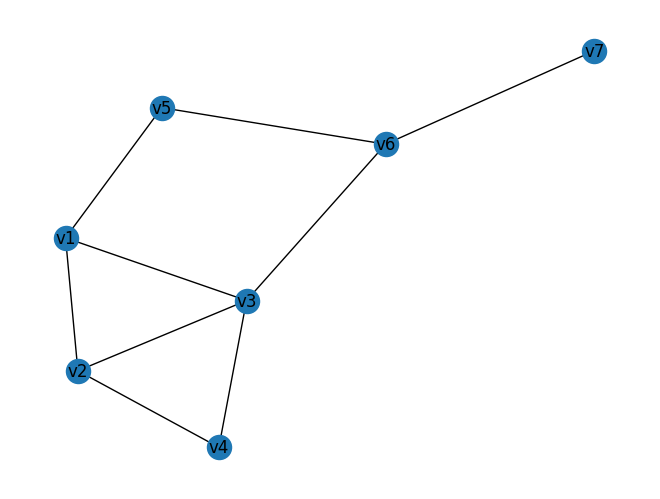

In [6]:
# エッジリストからGraphオブジェクトの作成
edge_list = [
    ("v1", "v2"),
    ("v1", "v3"),
    ("v1", "v5"),
    ("v2", "v3"),
    ("v2", "v4"),
    ("v3", "v4"),
    ("v3", "v6"),
    ("v5", "v6"),
    ("v6", "v7"),
]

G = nx.Graph(edge_list)
nx.draw(G, with_labels=True)

In [7]:
# ノード一覧の確認
print(G.nodes())
# ノードに付随する情報も合わせて確認。（ここでは空）
print(G.nodes(data=True))

# エッジ一覧の確認
print(G.edges())
# エッジに付随する情報も合わせて確認。（ここでは空）
print(G.edges(data=True))

['v1', 'v2', 'v3', 'v5', 'v4', 'v6', 'v7']
[('v1', {}), ('v2', {}), ('v3', {}), ('v5', {}), ('v4', {}), ('v6', {}), ('v7', {})]
[('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v3'), ('v2', 'v4'), ('v3', 'v4'), ('v3', 'v6'), ('v5', 'v6'), ('v6', 'v7')]
[('v1', 'v2', {}), ('v1', 'v3', {}), ('v1', 'v5', {}), ('v2', 'v3', {}), ('v2', 'v4', {}), ('v3', 'v4', {}), ('v3', 'v6', {}), ('v5', 'v6', {}), ('v6', 'v7', {})]


In [8]:
# 命名の対応を作成する
mapping = {
    "v1": "a",
    "v2": "b",
    "v3": "c",
}

# 命名の対応にしたがって名前をつける
H = nx.relabel_nodes(G, mapping)
print(H.nodes())

['a', 'b', 'c', 'v5', 'v4', 'v6', 'v7']


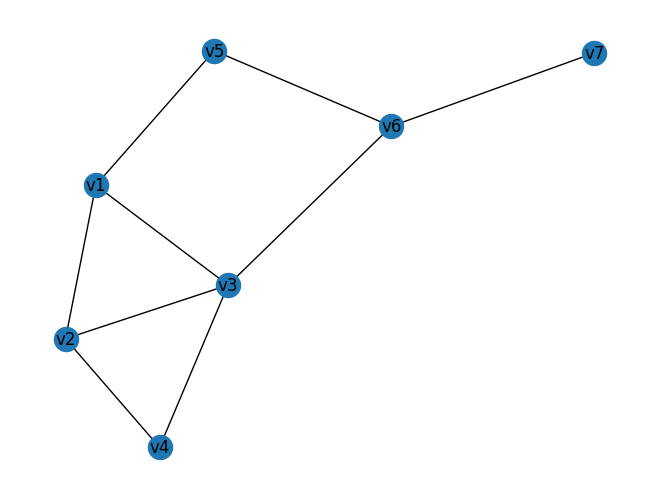

In [9]:
# 隣接リストの作成
adj_list = {
    "v1": ["v2", "v3", "v5"],
    "v2": ["v1", "v3", "v4"],
    "v3": ["v1", "v2", "v4", "v6"],
    "v4": ["v2", "v3"],
    "v5": ["v1", "v6"],
    "v6": ["v3", "v5", "v7"],
    "v7": ["v6"],
}

# 隣接リストからGraphオブジェクトの作成
G = nx.Graph(adj_list)
nx.draw(G, with_labels=True)

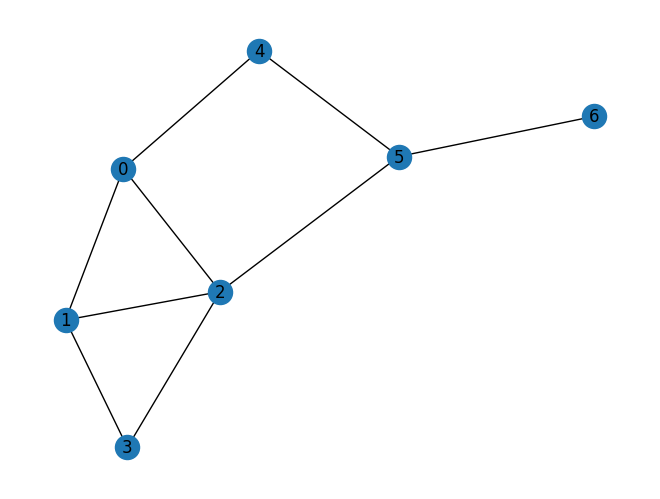

In [5]:
# 隣接行列の作成
adj_matrix = np.array(
    [[0, 1, 1, 0, 1, 0, 0],
    [1, 0, 1, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]],
)

# 隣接行列からGraphオブジェクトの作成
G = nx.from_numpy_array(adj_matrix)
nx.draw(G, with_labels=True)

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# データフレームの作成
data = {
    'source': ['A', 'B', 'C', 'A'],  # 辞書のキーが列名に対応
    'target': ['D', 'A', 'E', 'C'],  # ノード間の接続情報を表す
}
df = pd.DataFrame(data)  # 辞書からDataFrameを作成
df

,source,target
0,A,D
1,B,A
2,C,E
3,A,C


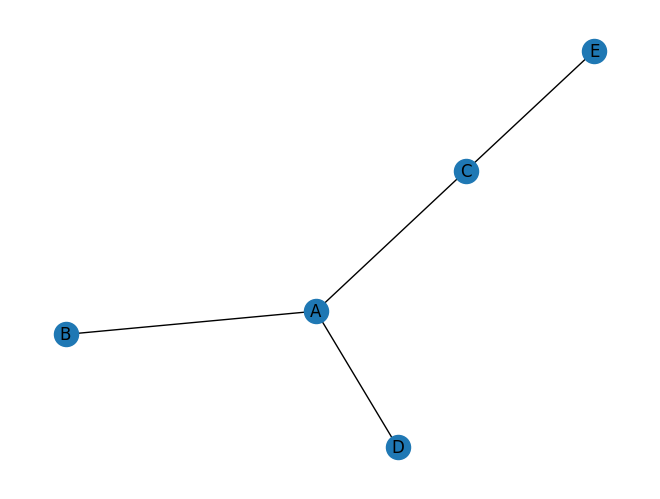

In [3]:
# NetworkXグラフの作成
# 第2・第3引数にはノードを示す列名を指定
G_df = nx.from_pandas_edgelist(df, 'source', 'target')

# グラフの描画
nx.draw(G_df, with_labels=True)

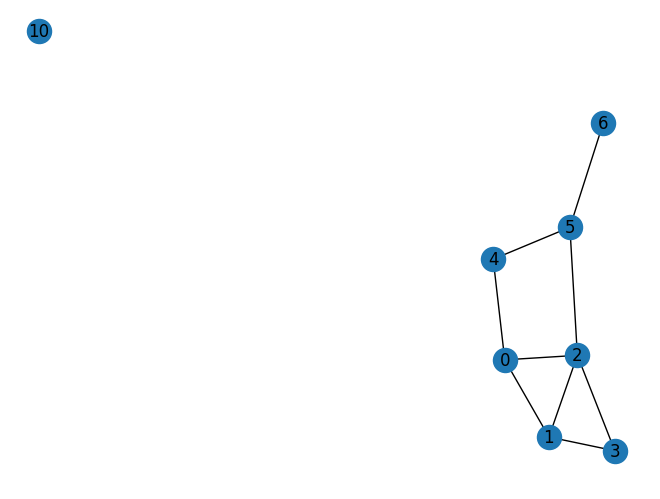

In [7]:
newG = G.copy()

# ノード単体の追加
newG.add_node(10)
nx.draw(newG, with_labels=True)

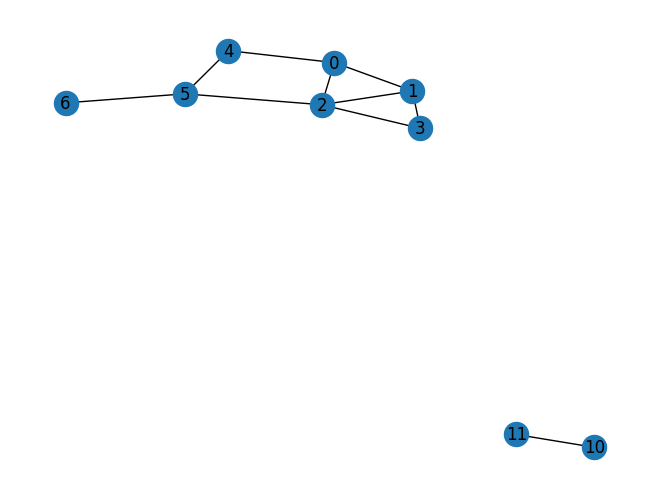

In [8]:
# エッジ単位での追加
newG.add_edge(10, 11)
nx.draw(newG, with_labels=True)

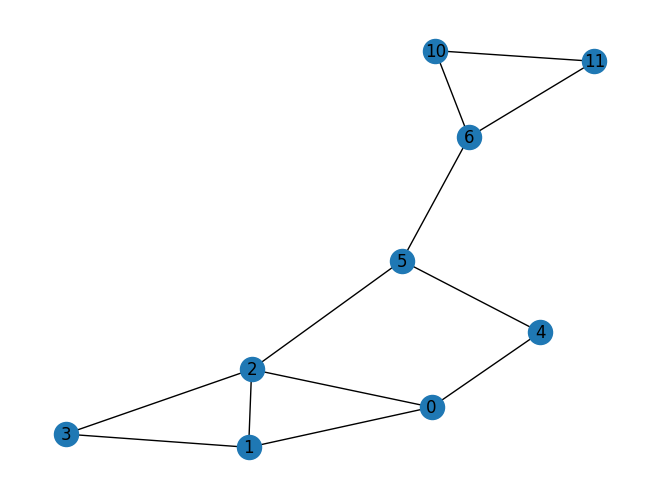

In [9]:
# 複数のエッジの追加
newG.add_edges_from([(11, 6), (10, 6)])
nx.draw(newG, with_labels=True)

In [10]:
newG = G.copy()

# ノードの属性情報の追加
newG.nodes[0]['name'] = "v1"
newG.nodes[0]["signal"] = 1.3

# 複数のノードに属性情報を追加
newG.add_nodes_from(
    [
        (1, {"name": "v2", "signal": 1.4}),
        (2, {"name": "v3", "signal": 1.5}),
    ]
)


# エッジに属性情報を追加
newG.edges[0, 4]['weight'] = 2
# custom attr
newG.edges[0, 4]['name'] = "fuga"

# ノード情報の表示
print(newG.nodes(data=True))

# エッジ情報の表示
print(newG.edges(data=True))

[(0, {'name': 'v1', 'signal': 1.3}), (1, {'name': 'v2', 'signal': 1.4}), (2, {'name': 'v3', 'signal': 1.5}), (3, {}), (4, {}), (5, {}), (6, {})]
[(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (0, 4, {'weight': 2, 'name': 'fuga'}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (2, 3, {'weight': 1}), (2, 5, {'weight': 1}), (4, 5, {'weight': 1}), (5, 6, {'weight': 1})]


In [17]:
edge_list = nx.edges(G)
print(edge_list)

[(0, 1), (0, 2), (0, 4), (1, 2), (1, 3), (2, 3), (2, 5), (4, 5), (5, 6)]


In [19]:
adj_list = nx.to_dict_of_lists(G)
print(adj_list)

{0: [1, 2, 4], 1: [0, 2, 3], 2: [0, 1, 3, 5], 3: [1, 2], 4: [0, 5], 5: [2, 4, 6], 6: [5]}


In [20]:
# 別の方法
print(nx.get_node_attributes(newG, "name"))
print(nx.get_node_attributes(newG, "signal"))

{0: 'v1', 1: 'v2', 2: 'v3'}
{0: 1.3, 1: 1.4, 2: 1.5}


In [21]:
print(nx.get_edge_attributes(newG, "weight"))
print(nx.get_edge_attributes(newG, "name"))

{(0, 1): 1, (0, 2): 1, (0, 4): 2, (1, 2): 1, (1, 3): 1, (2, 3): 1, (2, 5): 1, (4, 5): 1, (5, 6): 1}
{(0, 4): 'fuga'}


In [3]:
import torch
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.utils import to_undirected

In [27]:
edge_index = torch.tensor(
    [
        [0, 1, 1, 2],
         [1, 0, 2, 1]
     ],
    dtype=torch.long
  )
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

G = Data(x=x, edge_index=edge_index)

In [4]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root="./Cora",name= "Cora")

Processing...
Done!


In [5]:
type(dataset)

torch_geometric.datasets.planetoid.Planetoid

In [6]:
print(dataset)
print("ネットワークの数:",len(dataset))
print("ノードのクラス数:",dataset.num_classes)
print("ノードの特徴量の次元数:",dataset.num_node_features)
print("エッジの特徴量の次元数:",dataset.num_edge_features)

Cora()
ネットワークの数: 1
ノードのクラス数: 7
ノードの特徴量の次元数: 1433
エッジの特徴量の次元数: 0


In [7]:
G = dataset[0] # dataset.data
print(G)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [8]:
from torch_geometric.utils import to_networkx

G = torch_geometric.utils.to_networkx(G, to_undirected=True)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


In [10]:
!git config --global --add safe.directory /app/notebooks

In [11]:
!git remote

origin


In [1]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Cora/
	chapter_02.ipynb
	git-kwatanabe-repo/
	test.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [3]:
!git fetch origin

In [4]:
!git add chapter_02.ipynb

In [1]:
!git commit -m 'Graphtext'

[main af713a7] Graphtext
 1 file changed, 1028 insertions(+)
 create mode 100644 chapter_02.ipynb


In [2]:
!git status

On branch main
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Chapter2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Cora/
	PubMed/
	chapter03.ipynb
	git-kwatanabe-repo/
	test.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [3]:
!git branch

* main


In [4]:
!git branch -M main

In [5]:
!git branch

* main


In [6]:
!git reset --hard origin/main

HEAD is now at 699a972 changed finish


In [7]:
!git status

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Cora/
	PubMed/
	chapter03.ipynb
	git-kwatanabe-repo/
	test.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [19]:
!git branch

* main


In [8]:
!git log

commit 699a972c7e51ebec3d7d2822cef749fb6561d278 (HEAD -> main, origin/main, origin/NetworkTexts)
Author: kggiitthub <kwatanabe@lake.ocn.ne.jp>
Date:   Mon Mar 17 06:52:27 2025 +0000

    changed finish

commit 684531ce0a1fc0881ca80826b421a95b512d2df3
Author: kggiitthub <kwatanabe@lake.ocn.ne.jp>
Date:   Fri Mar 14 09:20:12 2025 +0000

    notebook test

commit 20fa93c29690abd2ac4e1a7f24e1c4f5c69dae62
Author: kggiitthub <kwatanabe@lake.ocn.ne.jp>
Date:   Fri Mar 14 08:52:28 2025 +0000

    20250314

commit 5bbc021839ec9f5b99ff56bc5a625179c13b8b32
Author: kggiitthub <115229232+kggiitthub@users.noreply.github.com>
Date:   Mon Dec 26 14:46:25 2022 +0900

    test14.txt

commit d4e23ac3343a75ddce8f7821c8e35f4ee19c896c
Author: kggiitthub <115229232+kggiitthub@users.noreply.github.com>
Date:   Mon Dec 26 14:34:50 2022 +0900

    test test test

commit c4ac91d3f3473b53dd09b17fddbadc53271efd5b
Author: kggiitthub <115229232+kggiitthub@users.noreply.github.com>
Date:   Mon Dec 26 14:28:06 2022 +0

In [9]:
!git pull origin main

remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 2 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (2/2), 854 bytes | 854.00 KiB/s, done.
From https://github.com/kggiitthub/git-kwatanabe-repo
 * branch            main       -> FETCH_HEAD
   699a972..d07f9d5  main       -> origin/main
Updating 699a972..d07f9d5
Fast-forward
 Chapter2.ipynb | 558 ---------------------------------------------------------
 1 file changed, 558 deletions(-)
 delete mode 100644 Chapter2.ipynb


In [10]:
!git status

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Cora/
	PubMed/
	chapter03.ipynb
	chapter_02.ipynb
	git-kwatanabe-repo/
	test.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [11]:
!git fetch origin

remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 2 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (2/2), 853 bytes | 853.00 KiB/s, done.
From https://github.com/kggiitthub/git-kwatanabe-repo
   699a972..2df5cbb  NetworkTexts -> origin/NetworkTexts


In [13]:
!git reset --hard origin/main

HEAD is now at d07f9d5 Delete Chapter2.ipynb


In [14]:
!git status

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Cora/
	PubMed/
	chapter03.ipynb
	chapter_02.ipynb
	git-kwatanabe-repo/
	test.ipynb

nothing added to commit but untracked files present (use "git add" to track)
